In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import numpy as np
import pandas as pd

from os.path import join

import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

%matplotlib inline

In [3]:
## Load the State and Trait scores
eCON = '/data/bswift-1/Pessoa_Lab/eCON'
scores = pd.read_excel(join(eCON,'STAIscores/scores.xlsx'))
scores.rename(columns={'SCORING':'TRAIT'},inplace=True)
scores.drop(columns=['PAIR SCORE'],inplace=True)
scores['SubID'] = scores['SubID'].apply(lambda name: ''.join(name.strip().split("_")))

In [12]:
# ROIs to be included in the RBA
ROIs = {'old':'rBNST lBNST rdAI rvAI vmPFC PCC1 rPAG lPAG PCC2 ldAI\
                lvAI rPI lPI rCa lCa rPa lPa rVS lVS Amygdala_BLBM_La_L\
                Amygdala_BLBM_La_R Amygdala_CeME_L Amygdala_CeME_R ACC'.split(),
        'new':['L Amygdala (BLBM)',
               'R Amygdala (BLBM)',
               'L Amygdala (CeME)',
               'R Amygdala (CeME)',
               'L aMCC',
               'R aMCC',
               'L Thalamus (emoproxI shock intersection)',
               'R Thalamus (emoproxI shock intersection)',
               'L Anterior dorsal insula',
               'R Anterior dorsal insula',
               'L Mid posterior insula',
               'R Mid posterior insula',
               'L Anterior ventral insula (anterior pole)',
               'R Anterior ventral insula (anterior pole)',
               'vmPFC (new 5mm sphere from Hartley paper)',
               'L BST',
               'L Anterior hippocampus',
               'L PAG',
               'PCC (1)',
               'PCC (2)',
               'R  BST',
               'R Anterior hippocampus',
               'R PAG',
               'vmPFC (from out lab)']
       }
rois = ROIs['new']

## List of ROIs to included in RBA

In [13]:
for i,roi in enumerate(rois):
    print(i+1,roi)

1 L Amygdala (BLBM)
2 R Amygdala (BLBM)
3 L Amygdala (CeME)
4 R Amygdala (CeME)
5 L aMCC
6 R aMCC
7 L Thalamus (emoproxI shock intersection)
8 R Thalamus (emoproxI shock intersection)
9 L Anterior dorsal insula
10 R Anterior dorsal insula
11 L Mid posterior insula
12 R Mid posterior insula
13 L Anterior ventral insula (anterior pole)
14 R Anterior ventral insula (anterior pole)
15 vmPFC (new 5mm sphere from Hartley paper)
16 L BST
17 L Anterior hippocampus
18 L PAG
19 PCC (1)
20 PCC (2)
21 R  BST
22 R Anterior hippocampus
23 R PAG
24 vmPFC (from out lab)


In [14]:
# Load the data that contains shock betas for all participants
beta_df = pd.read_csv('Individual_betas_from_ROI_analysis_S_buttonPress.csv') # old rois
beta_df = pd.read_csv('data/Individual_betas_from_ROI_final_S_buttonPress.csv')

In [15]:
# Get only the shock betas for the rois mentioned above from beta_df and save it as a new df (all_roi_df)
all_rois_df = beta_df[beta_df['ROI'].isin(rois)][['Pair','Subject','Group','ROI','beta']]

In [16]:
# Pivot the table such that shock betas for every roi are put in separate columns
all_rois_df = all_rois_df.groupby(['Pair','Subject','Group','ROI'])['beta'].mean().unstack()
# Reset the columns because groupby create the creates multiple index columns
all_rois_df.reset_index(inplace=True)

In [17]:
# Extract the shock beta values from both goups, and subtract one from the other (uncontrol - control)
all_rois_pair_df = all_rois_df[all_rois_df['Group']=='uncontrol'][rois].values - all_rois_df[all_rois_df['Group']=='control'][rois].values
all_rois_pair_df = pd.DataFrame(all_rois_pair_df,columns=rois, index=all_rois_df.Pair.unique())
all_rois_pair_df.index.name = 'Pair'

In [18]:
all_rois_pair_df.reset_index(inplace = True)
all_rois_pair_df.head()

,Pair,L Amygdala (BLBM),R Amygdala (BLBM),L Amygdala (CeME),R Amygdala (CeME),L aMCC,R aMCC,L Thalamus (emoproxI shock intersection),R Thalamus (emoproxI shock intersection),L Anterior dorsal insula,...,vmPFC (new 5mm sphere from Hartley paper),L BST,L Anterior hippocampus,L PAG,PCC (1),PCC (2),R BST,R Anterior hippocampus,R PAG,vmPFC (from out lab)
0,P00,-0.084068,0.130485,0.182728,0.231786,1.308880,0.859432,0.383948,0.557443,0.352512,...,-0.184515,1.179902,-0.076598,-0.094606,0.510802,0.465975,0.618671,-0.129525,0.742407,0.023977
1,P01,0.872066,0.216880,0.091150,-0.123404,0.093199,0.322511,-0.024085,-0.183579,0.472212,...,-0.366622,0.906558,0.557257,0.604223,-0.314802,-0.366220,-0.693434,0.380411,0.195783,-0.282359
2,P02,-0.622541,0.526499,0.517381,-2.018683,0.223780,0.245688,-0.330474,-0.497006,0.207332,...,0.059929,-0.073610,-0.276568,-0.201661,-0.262267,-0.147465,-0.576978,-0.005498,-0.822900,-0.204460
3,P03,0.077980,-0.146649,-1.145212,-0.845632,0.099647,0.116781,0.083317,0.341529,0.327104,...,0.273050,0.419963,0.122965,0.071113,-0.235017,0.178316,0.095094,-0.258402,-0.558664,-0.232257
4,P04,-0.114705,0.129912,0.198253,-0.158917,-0.324069,0.512283,0.196029,0.395158,0.253511,...,-0.165839,0.128474,0.084028,-0.406341,0.377827,-0.516481,0.165573,-0.108967,0.685988,-0.565311


In [19]:
new_score_df = pd.DataFrame()
for pair in all_rois_df.Pair.unique():
    con = all_rois_df[(all_rois_df['Pair']==pair) & (all_rois_df['Group'] == 'control')]['Subject'].values[0]
    uncon = all_rois_df[(all_rois_df['Pair']==pair) & (all_rois_df['Group'] == 'uncontrol')]['Subject'].values[0]
    
    
    conTrait = scores[scores['SubID'] == con]['TRAIT'].values[0]
    unconTrait = scores[scores['SubID'] == uncon]['TRAIT'].values[0]
    
    conState = scores[scores['SubID'] == con]['STATE'].values[0]
    unconState = scores[scores['SubID'] == uncon]['STATE'].values[0]
    
    tmp_df = pd.DataFrame([pair,uncon,con,
                           unconTrait,conTrait,unconTrait-conTrait,np.mean([unconTrait,conTrait]),
                           unconState,conState,unconState-conState,np.mean([unconState,conState])],
                          index=['Pair',('SubID','uncontrol'),('SubID','control'),
                                  ('TRAIT','uncontrol'),('TRAIT','control'),('TRAIT','uncon-con'),('TRAIT','mean'),
                                  ('STATE','uncontrol'),('STATE','control'),('STATE','uncon-con'),('STATE','mean')]).T
    
    new_score_df = pd.concat([new_score_df,tmp_df],axis=0)
    
new_score_df.set_index('Pair',inplace=True)

In [20]:
# drop unimportant columns from the STAI scores df (new_score_Df)
new_score_df = new_score_df[[('TRAIT','uncon-con'),('TRAIT','mean'),('STATE','uncon-con'),('STATE','mean')]]

In [21]:
# Convert the numerical columns of new_score_df to float
for col in new_score_df.columns:
    new_score_df[col] = new_score_df[col].astype(float)

In [22]:
new_score_df.head()

,"(TRAIT, uncon-con)","(TRAIT, mean)","(STATE, uncon-con)","(STATE, mean)"
Pair,,,,
P00,0.0,27.0,-2.0,23.0
P01,9.0,31.5,4.0,28.0
P02,1.0,36.5,3.0,27.5
P03,3.0,22.5,-1.0,20.5
P04,0.0,33.0,6.0,29.0


In [23]:
# Reformat the tupled column names for (TRAIT, uncon-con) (TRAIT, mean) (STATE, uncon-con) (STATE, mean)
col_to_drop = []
for col in new_score_df.columns:
    if type(col) is tuple:
        
        col_to_drop.append(col)
        
        STAI, kind = col
        
        if '-' in kind:
            kind = 'diff'
            
        new_score_df[''.join([STAI,kind])] = new_score_df[col]
        
new_score_df.drop(columns=col_to_drop,inplace=True)

In [24]:
new_score_df.head()

,TRAITdiff,TRAITmean,STATEdiff,STATEmean
Pair,,,,
P00,0.0,27.0,-2.0,23.0
P01,9.0,31.5,4.0,28.0
P02,1.0,36.5,3.0,27.5
P03,3.0,22.5,-1.0,20.5
P04,0.0,33.0,6.0,29.0


In [25]:
# Standardize the four STAI scores
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_score_df_norm = pd.DataFrame(ss.fit_transform(new_score_df),
                                 columns=new_score_df.columns,
                                 index=new_score_df.index)

In [26]:
# Melt the allall_rois_pair_df such that all shock beta values are put one column, and every beta is marked by the roi which it belongs to by another column 'ROI' nex to it
all_rois_pair_df_melted = all_rois_pair_df.melt(id_vars='Pair',var_name='ROI',value_name='Y')
all_rois_pair_df_melted.set_index('Pair',inplace=True)
all_rois_pair_df_melted.head()

,ROI,Y
Pair,,
P00,L Amygdala (BLBM),-0.084068
P01,L Amygdala (BLBM),0.872066
P02,L Amygdala (BLBM),-0.622541
P03,L Amygdala (BLBM),0.077980
P04,L Amygdala (BLBM),-0.114705


In [27]:
# Join (on index 'Pair') the STAI score (new_score_df) and the roi shock beta (all_rois_pair_df_melted) dataframes
full_df = all_rois_pair_df_melted.join(new_score_df_norm)
full_df.reset_index(inplace=True)
full_df['Subj'] = full_df['Pair']
full_df.drop(columns = 'Pair',inplace=True)
col_order = ['Subj','ROI','Y','TRAITmean','TRAITdiff','STATEmean','STATEdiff']

In [28]:
print(full_df.head())
print(full_df.tail())

                 ROI         Y  TRAITdiff  TRAITmean  STATEdiff  STATEmean  \
0  L Amygdala (BLBM) -0.084068  -0.040647  -1.003049  -0.181211  -1.230659   
1  R Amygdala (BLBM)  0.130485  -0.040647  -1.003049  -0.181211  -1.230659   
2  L Amygdala (CeME)  0.182728  -0.040647  -1.003049  -0.181211  -1.230659   
3  R Amygdala (CeME)  0.231786  -0.040647  -1.003049  -0.181211  -1.230659   
4             L aMCC  1.308880  -0.040647  -1.003049  -0.181211  -1.230659   

  Subj  
0  P00  
1  P00  
2  P00  
3  P00  
4  P00  
                         ROI         Y  TRAITdiff  TRAITmean  STATEdiff  \
1459                 PCC (2) -0.869129  -1.103272   0.572285  -1.177055   
1460                  R  BST  0.671570  -1.103272   0.572285  -1.177055   
1461  R Anterior hippocampus -0.161306  -1.103272   0.572285  -1.177055   
1462                   R PAG  0.081098  -1.103272   0.572285  -1.177055   
1463    vmPFC (from out lab) -0.312117  -1.103272   0.572285  -1.177055   

      STATEmean Subj  
145

In [29]:
full_df[col_order].to_csv('01-uncon_v_con_shock_MR_ROI24_with_covariates/uncon_v_con_shock_MR_ROI24final_with_covariates.txt',sep='\t',float_format='%.4f',index=False)

In [35]:
#full_df[full_df['ROI']=='rBNST'][col_order].drop(columns='ROI').to_csv('uncon_v_con_rBNST_with_covariates/uncon_v_con_shock_MR_rBNST_with_covariates2.txt',sep='\t',float_format='%.4f',index=False)

# Distribution of Y (shock beta contrast [uncon-con])

Text(0.75, 150, 'Skeweness=0.327')

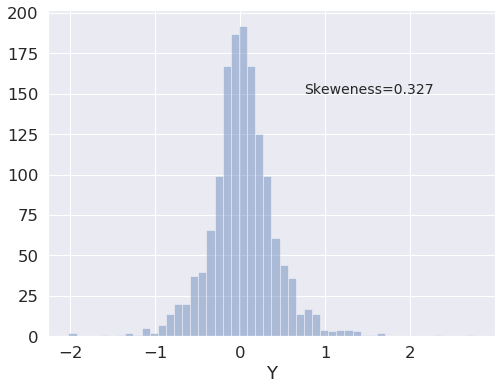

In [30]:
plt.figure(figsize = (8,6))
sns.distplot(full_df.Y,kde=False)
plt.text(x=0.75,y=150, s='Skeweness=%.3f' %(full_df.Y.skew()),fontdict={'size':14})

There is minor skewness but there are also a few outliers. Hence use student-t distribution for Y in RBA.